In [1]:
import pickle


def load_rule_label(path):
    data = pickle.load(open(path, 'rb'))
    return data


rule_label = 'data/ICEWS05-15/subgraph1'
label = 'ICEWS18'
data = load_rule_label(rule_label)


In [10]:
def load_quadruples(inpath):
    """train.txt/valid.txt/test.txt reader
    inpath: File path. train.txt, valid.txt or test.txt of a dataset;
    return:
        quadrupleList: A list
        containing all quadruples([subject/headEntity, relation, object/tailEntity, timestamp]) in the file.
    """
    with open(inpath, 'r') as f:
        quadrupleList = []
        for line in f:
            try:
                line_split = line.split()
                head = int(line_split[0])
                rel = int(line_split[1])
                tail = int(line_split[2])
                time = int(line_split[3])
                quadrupleList.append([head, rel, tail, time])
            except:
                print(line)
    return quadrupleList

In [ ]:
def get_node_list(datas):
    train_new_nodes = []
    for head,rel,tail,timestamp in datas:
        src_node = (head,timestamp)
        dst_node = (tail,timestamp)
        if src_node not in train_new_nodes:
            train_new_nodes.append(src_node)
        if dst_node not in train_new_nodes:
            train_new_nodes.append(dst_node)
    return train_new_nodes


# 这里说明有一些的结点是不在train_node中，说明邻居结点可能时间上面有点不一样

In [2]:
a = {}  
for k, v in data.items():  
    if v:  # 确保 v 不是空列表  
        length = len(v[0])  
        if length in a:  
            a[length] += 1  
        else:  
            a[length] = 1  
print(a)


{32: 284, 14: 885, 140: 7218, 131: 76, 13: 1049, 88: 87, 64: 95, 121: 61, 23: 640, 10: 1244, 70: 210, 4: 2148, 2: 6737, 52: 172, 133: 26, 12: 1153, 55: 113, 113: 93, 110: 50, 11: 1188, 96: 31, 124: 138, 19: 761, 7: 1395, 31: 376, 17: 851, 16: 845, 24: 488, 112: 117, 25: 444, 132: 99, 94: 149, 3: 2775, 5: 1627, 119: 84, 41: 252, 71: 100, 22: 556, 109: 112, 62: 150, 108: 105, 44: 225, 69: 180, 72: 99, 95: 95, 76: 57, 18: 711, 65: 134, 9: 1404, 102: 91, 93: 98, 33: 274, 68: 139, 60: 141, 8: 1325, 20: 676, 107: 126, 39: 282, 51: 161, 50: 176, 97: 77, 49: 226, 111: 125, 38: 275, 27: 404, 74: 108, 89: 74, 87: 108, 6: 1438, 73: 133, 123: 65, 59: 196, 45: 208, 63: 204, 21: 554, 48: 177, 15: 883, 35: 367, 86: 69, 26: 420, 30: 343, 36: 295, 67: 246, 122: 41, 56: 178, 61: 103, 58: 124, 40: 284, 46: 180, 54: 146, 43: 259, 92: 64, 34: 356, 53: 159, 91: 121, 120: 88, 42: 206, 85: 112, 28: 350, 75: 67, 115: 101, 37: 278, 114: 62, 29: 365, 118: 82, 66: 118, 84: 63, 83: 79, 57: 138, 47: 248, 106: 122, 

In [3]:
arra = []
for i in range(141):
    try:
        print(i,':',a[i])
        arra.append(a[i])
    except:
        print(i)
        arra.append(0)

0
1 : 17
2 : 6737
3 : 2775
4 : 2148
5 : 1627
6 : 1438
7 : 1395
8 : 1325
9 : 1404
10 : 1244
11 : 1188
12 : 1153
13 : 1049
14 : 885
15 : 883
16 : 845
17 : 851
18 : 711
19 : 761
20 : 676
21 : 554
22 : 556
23 : 640
24 : 488
25 : 444
26 : 420
27 : 404
28 : 350
29 : 365
30 : 343
31 : 376
32 : 284
33 : 274
34 : 356
35 : 367
36 : 295
37 : 278
38 : 275
39 : 282
40 : 284
41 : 252
42 : 206
43 : 259
44 : 225
45 : 208
46 : 180
47 : 248
48 : 177
49 : 226
50 : 176
51 : 161
52 : 172
53 : 159
54 : 146
55 : 113
56 : 178
57 : 138
58 : 124
59 : 196
60 : 141
61 : 103
62 : 150
63 : 204
64 : 95
65 : 134
66 : 118
67 : 246
68 : 139
69 : 180
70 : 210
71 : 100
72 : 99
73 : 133
74 : 108
75 : 67
76 : 57
77 : 53
78 : 66
79 : 117
80 : 101
81 : 88
82 : 68
83 : 79
84 : 63
85 : 112
86 : 69
87 : 108
88 : 87
89 : 74
90 : 79
91 : 121
92 : 64
93 : 98
94 : 149
95 : 95
96 : 31
97 : 77
98 : 57
99 : 84
100 : 90
101 : 141
102 : 91
103 : 127
104 : 65
105 : 96
106 : 122
107 : 126
108 : 105
109 : 112
110 : 50
111 : 125
112 : 117
1

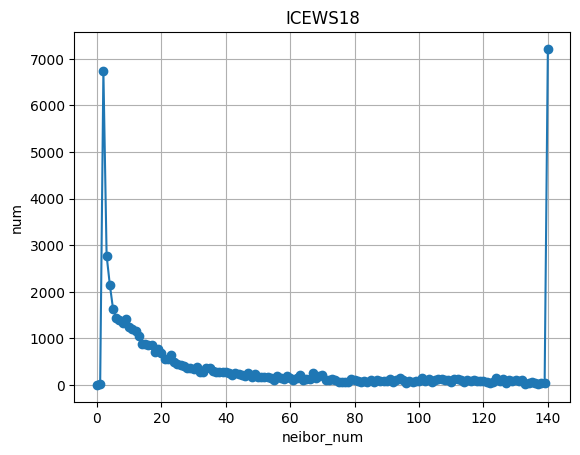

In [4]:
import matplotlib.pyplot as plt  
def plot(data,data_name):
# 假设您的字典数据如下  
      
    # 获取字典的键和值  
    x = range(len(data)) # x轴的值  
    y = data  # y轴的值  
      
    # 绘制折线图  
    plt.plot(x, y, marker='o')  # marker='o' 表示在每个数据点上显示一个圆圈  
      
    # 添加标题和标签  
    plt.title(data_name)  
    plt.xlabel('neibor_num')  
    plt.ylabel("num")  
      
    # 显示网格线（可选）  
    plt.grid(True)  
      
    # 显示图表  
    plt.show()
plot(arra,label)

In [47]:
import os
data_path = 'data/WIKI'

test_path = os.path.join(data_path, 'test.txt')
valid_path = os.path.join(data_path, 'valid.txt')
train_path = os.path.join(data_path, 'train.txt')
test = load_quadruples(test_path)
valid = load_quadruples(valid_path)
train = load_quadruples(train_path)
print(len(test))
print(len(valid))
print(len(train))

63110
67538
539286


In [4]:
def count_bool_num(test, data,padding):
    count =0
    for head,rel,tail,timestamp in test:
        flag=0
        # print(head,timestamp)
        subgraph_entity = data[(head,timestamp)][0][:padding]
        subgraph_timestamp = data[(head,timestamp)][1][:padding]
        if tail in subgraph_entity:
            continue
        for index,entity in enumerate(subgraph_entity):
            subgraph_entity1 = data[(entity,subgraph_timestamp[index])][0][:padding]
            subgraph_timestamp1 = data[(entity,subgraph_timestamp[index])][1][:padding]
            if tail in subgraph_entity1:
                flag=1
                break
            for index1 , entity1 in enumerate(subgraph_entity1):
                subgraph_entity2 = data[(entity1,subgraph_timestamp1[index1])][0][:padding]
                # subgraph_timestamp2 = data[(entity1,subgraph_timestamp1[index1])][1]
                if tail in subgraph_entity2:
                    flag=1
                    break
            if flag==1:
                break
        if flag==0 :
            count += 1
        
    print(count)

In [8]:
all_data = train+test+valid
count_bool_num(all_data,data,26)

5


In [85]:
entitys_list = {}
for h,r,t,tim in all_data:
    src_node = h
    dst_node = t
    if src_node not in entitys_list.keys():
        entitys_list[(src_node)] =1
    else:
        entitys_list[(src_node)] += 1
    if dst_node not in entitys_list.keys():
        entitys_list[(dst_node)] = 1
    else:
        entitys_list[(dst_node)] += 1

    

In [88]:
print(entitys_list)

{10289: 1, 10290: 1, 8429: 8, 8468: 1, 9384: 1, 9385: 1, 7184: 186, 7185: 186, 10357: 1, 10358: 1, 8276: 6, 8277: 1, 2340: 191, 6449: 188, 6881: 39, 6882: 39, 3399: 4, 5397: 3, 6525: 564, 6869: 188, 10132: 1, 10133: 1, 9370: 1, 9371: 1, 6383: 941, 6417: 188, 6785: 188, 6786: 188, 6807: 752, 6907: 188, 6499: 564, 6500: 188, 6596: 188, 6597: 188, 6584: 8, 10254: 1, 7954: 1, 7955: 1, 298: 5, 8838: 1, 9093: 1, 9094: 1, 6676: 940, 7207: 188, 7421: 188, 7422: 188, 7061: 376, 7062: 188, 9007: 1, 9008: 1, 8703: 1, 8704: 1, 234: 142, 6450: 138, 7552: 4, 7999: 1, 9935: 1, 9936: 1, 6855: 376, 6856: 188, 9521: 1, 9522: 1, 7137: 188, 7138: 188, 7415: 188, 8311: 1, 8312: 1, 8679: 1, 8687: 1, 8688: 1, 7636: 377, 7663: 3197, 7880: 1, 7881: 1, 7032: 188, 7033: 188, 9179: 1, 9180: 1, 6826: 188, 6827: 188, 8477: 2, 8478: 1, 9648: 1, 9649: 1, 1692: 5, 10377: 1, 4045: 188, 3846: 564, 3125: 3, 2999: 3, 6523: 188, 6524: 188, 8092: 4, 8727: 1, 6730: 188, 7057: 188, 7058: 188, 6550: 188, 6551: 188, 8967: 1, 89

In [89]:
count = 0
for k,v in entitys_list.items():
    if  v == 1:
        # print(k)
        count += 1
print(count)

2519


In [90]:
count=0
for h,r,t,tim in all_data:
    if entitys_list[(h)] ==1 or entitys_list[(t)]==1:
        count +=1
print(count)

1822


In [44]:
def count_entity_num(test):
    entitylist = []
    for head,rel,tail,timestamp in test:
        if head not in entitylist:
            entitylist.append(head)
        if tail not in entitylist:
            entitylist.append(tail)
    print(len(entitylist))

In [45]:
count_entity_num(train)
count_entity_num(test)
count_entity_num(valid)
"""有很多的实体是只在test和valid中出现的，在train中没有出现过"""

6180
2845
2968


In [3]:
import random

def save_100(data,path):
    length = len(data)
    with open(path, 'w') as file:  
        random.shuffle(data)
        for i,quad in enumerate(data):  
            # 将四元组转换为字符串，元素之间用空格分隔  
            line = ' '.join(map(str, quad))  
            # 写入文件并换行  
            file.write(line + '\n')
            if i>length/100:
                break

In [4]:
valid_path1 = os.path.join(data_path, 'valid_test.txt')
test_path1 = os.path.join(data_path, 'test_test.txt')
train_path1 = os.path.join(data_path, 'train_test.txt')
save_100(train,train_path1)
save_100(test,test_path1)
save_100(valid,valid_path1)